# Intro
We'll be analyzing the Sloan Digital Sky Survey (DR18) dataset and use classification to classify galaxies, stars and quasars in order to make future identification faster and easier.

The full report is presented alongside the code, including visualization, summaries and takeaways.

## Dataset
We're using the `Sloan Digital Sky Survey - DR18` found on Kaggle.
The page gives us a detailed description of the features we'll be working with
This dataset consists of 100,000 observations from the Data Release (DR) 18 of the Sloan Digital Sky Survey (SDSS). Each observation is described by 42 features and 1 class column classifying the observation as either:

- a STAR
- a GALAXY
- a QSO (Quasi-Stellar Object) or a Quasar.

You can read more about the features below:

- Objid, Specobjid - Object Identifiers
- ra - J2000 Right Ascension
- dec - J2000 Declination
- redshift - Final Redshift of the celestial object
- u, g, r, i, and z - better of DeV/Exp magnitude fit for u, g, r, i, and z. u, g, r, i, and z correspond to the five photometric bands namely ultraviolet band, green band, red band, infrared band, and near infrared band respectively.
- run - Run number
- rerun - Rerun number
- camcol - Camera column
- field - Field number

The run number refers to a specific period in which the SDSS observes a part of the sky. SDSS is divided into several runs, each lasting for a certain amount of time, which are then combined to cover an extensive portion of the sky. The rerun number refers to the reprocessing of the data obtained.

In each run, multiple charge-coupled device (CCD) cameras are arranged into a column which are responsible for imaging a specific portion of the sky. camcol refers to the camera column number which imaged a specific observation. A field is a specific portion of the sky that is imaged during a single exposure of the telescope. The entire sky is divided into a portion of fields and the field number column refers to the field or portion of the sky from which an observation was obtained.

- plate - Plate number
- fiberID - Optical Fiber ID

A number of physical glass plates are mounted on the telescope, each containing a number of optical fibers corresponding to a specific position in the sky. When light hits these optical fibers, it is sent to spectrographs for analysis. plate number and fiberID refer to the number of the plate and the ID of the optical fiber responsible for gathering light from the celestial object respectively.

- mjd - Modified Julian Date

Modified Julian Date represents the number of days that have passed since midnight Nov. 17, 1858. It is used in SDSS to keep track of the time of each observation.

- petroRad_u, petroRad_g, petroRad_r, petroRad_i, and petroRad_z - Petrosian Radii for the five photometric bands u (ultraviolet), g (green), r (red), i (infrared), and z (near-infrared) respectively.

The petrosian radius is a measure of the size of a galaxy, and it is calculated using the petrosian flux profile. The petrosian flux profile measures how the brightness of an object varies with distance from its center. The petrosian radius is defined as the distance from the galaxy's center where the ratio of the local surface brightness to the average surface brightness reaches a certain predefined value. The local surface brightness refers to the brightness of a specific small region or pixel on the surface of an extended object. It is a measure of how much light is detected from that particular region. The average surface brightness, on the other hand, represents the mean or average brightness measured over the entire surface of the extended object. It is the total amount of light received from the object divided by its total area.

These parameters help in characterizing the properties of celestial objects, especially when studying their morphologies, sizes, and how they evolve over time.

- petroFlux_u, petroFlux_g, petroFlux_r, petroFlux_i, and petroFlux_z - Petrosian Fluxes for the five photometric bands u (ultraviolet), g (green), r (red), i (infrared), and z (near-infrared) respectively. These features describe the total amount of light emitted from the celestial objects.

These parameters help in studying the photometric properties of the celestial objects, particularly in analyzing the brightness, colors, and spectral energy distribution of the objects. By using petrosian fluxes in different bands, astronomers can obtain a comprehensive view of an object's light emission across the electromagnetic spectrum.

- petroR50_u, petroR50_g, petroR50_r, petroR50_i, and petroR50_z - Petrosian half-light radii for the five photometric bands u (ultraviolet), g (green), r (red), i (infrared), and z (near-infrared) respectively. PetroR50 is a measure of the radius at which half of the total light (or flux) emitted from a celestial object is enclosed with the petrosian aperture. The petrosian aperture is defined based on the petrosian radius, which is a measure of the size of the celestial object. The petrosian aperture allows astronomers to capture a substantial fraction of the total light emitted by an extended object while minimizing the contamination from nearby sources or background noise.

These parameters are important for characterizing the sizes of objects in the SDSS data and how the sizes of the objects vary at different wavelengths.

- psfMag_u, psfMag_g, psfMag_r, psfMag_i, and psfMag_z - Magnitudes of objects measured using the Point Spread Function (PSF) in the five photometric bands u (ultraviolet), g (green), r (red), i (infrared), and z (near-infrared) respectively.

The Point Spread Function (PSF) is a mathematical model that describes the response of an imaging system, such as a telescope, to a point source of light (e.g., a star) in an image. As most astronomical objects are extended and not point sources, the PSF is often used to characterize the brightness of these extended objects by approximating them as if they were point sources.

The psfMag values represent the magnitudes of objects as measured through the PSF. Magnitude is a logarithmic scale used in astronomy to quantify the brightness of celestial objects. Lower magnitudes correspond to brighter objects, and higher magnitudes correspond to fainter objects. These PSF magnitudes help in characterizing the brightness and colors of astronomical objects, such as stars and galaxies, in the SDSS data.

- expAB_u, expAB_g, expAB_r, expAB_i, and expAB_z - axis ratio of exponential fits to the light profile of celestial objects observed in the five photometric bands u (ultraviolet), g (green), r (red), i (infrared), and z (near-infrared) respectively.

These axis ratios are morphological features that help characterize the shapes of celestial objects, such as galaxies, in different SDSS bands.

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_columns', 100)


## Importing the dataset

In [165]:
data = pd.read_csv('/content/sample_data/SDSS_DR18.csv')

In [166]:
data.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   objid        2889 non-null   float64
 1   specobjid    2889 non-null   float64
 2   ra           2889 non-null   float64
 3   dec          2889 non-null   float64
 4   u            2889 non-null   float64
 5   g            2889 non-null   float64
 6   r            2889 non-null   float64
 7   i            2889 non-null   float64
 8   z            2889 non-null   float64
 9   run          2889 non-null   int64  
 10  rerun        2889 non-null   int64  
 11  camcol       2889 non-null   int64  
 12  field        2889 non-null   int64  
 13  plate        2889 non-null   int64  
 14  mjd          2889 non-null   int64  
 15  fiberid      2889 non-null   int64  
 16  petroRad_u   2889 non-null   float64
 17  petroRad_g   2889 non-null   float64
 18  petroRad_i   2889 non-null   float64
 19  petroR

In [168]:
data.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
count,2.889000e+03,2.889000e+03,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.0,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,1.240000e+18,2.691700e+18,155.111476,7.196801,18.510801,17.218138,16.708794,16.473787,16.337996,829.713049,301.0,3.637591,302.721357,2390.599862,53603.305988,355.244375,4.689201,3.486668,3.275780,3.328071,3.471985,66.355551,246.463615,559.104986,415.799865,659.725922,1.670492,1.611516,1.489582,1.539796,-8.974113,19.143879,17.360689,17.870584,17.127825,16.974609,0.591278,0.669973,0.659437,0.647827,0.622871,0.152405
std,0.000000e+00,2.945159e+18,64.913893,18.969141,0.924778,1.069319,1.171068,1.227873,1.294589,317.260822,0.0,1.586556,190.783100,2616.887737,1823.384251,217.588045,9.928094,4.462215,4.298901,4.358300,5.047646,172.548461,703.394958,1713.525862,1114.134517,2204.023596,1.934003,1.902484,1.834028,1.874869,322.150156,1.402275,1.457800,1.449277,1.449562,1.438691,0.274995,0.248500,0.260440,0.263651,0.275219,0.586534
min,1.240000e+18,3.000000e+17,8.237201,-8.313907,13.394010,11.840130,11.633850,11.051390,10.616260,94.000000,301.0,1.000000,11.000000,266.000000,51608.000000,1.000000,1.027604,1.058555,0.583784,0.979331,0.654269,0.947063,10.334740,4.623398,7.371214,-3760.167000,0.384670,0.543002,0.277583,0.509416,-9999.000000,13.253570,11.698130,12.181000,11.206880,10.780100,0.050000,0.050000,0.050000,0.050000,0.050000,-0.004136
25%,1.240000e+18,3.730000e+17,114.278028,-0.547055,18.027200,16.624350,16.016870,15.757960,15.594230,752.000000,301.0,2.000000,119.000000,331.000000,51985.000000,176.000000,1.372851,1.302964,1.151496,1.201998,1.190434,20.180360,64.612840,123.494800,99.980090,135.089600,0.689932,0.664235,0.597923,0.620243,0.615367,18.269530,16.392670,16.919820,16.177880,16.069353,0.371553,0.510392,0.462536,0.449150,0.400016,0.000058
50%,1.240000e+18,1.420000e+18,177.333535,0.357204,18.735200,17.353960,16.772070,16.505740,16.352310,756.000000,301.0,4.000000,359.000000,1259.000000,52931.000000,344.000000,1.589754,1.484301,1.332228,1.356855,1.382261,31.094220,108.634200,235.993200,184.969100,264.504500,0.780000,0.742855,0.684047,0.696797,0.710215,19.133550,17.418770,17.899300,17.172570,17.009710,0.608593,0.703451,0.697487,0.678607,0.656903,0.000301
75%,1.240000e+18,3.550000e+18,196.444863,1.015228,19.232130,17.951400,17.449340,17.215560,17.100360,1045.000000,301.0,5.000000,461.000000,3157.000000,54802.000000,521.000000,5.236562,4.746342,4.513436,4.533575,4.608057,59.232250,214.622600,465.432100,366.240800,533.048500,2.133221,2.166715,2.031290,2.105750,1.954599,20.226930,18.471440,18.990920,18.190410,18.022178,0.821262,0.875987,0.884161,0.881257,0.854485,0.075730
max,1.240000e+18,1.410000e+19,358.986072,64.978728,19.599120,19.921530,20.344480,20.662130,23.357370,1331.000000,301.0,6.000000,710.000000,12547.000000,58932.000000,1000.000000,258.359600,107.127400,96.987780,101.178800,93.960780,4226.876000,17890.530000,37028.480000,24774.010000,50039.270000,32.350830,48.917100,44.316620,43.741620,21.986530,22.631310,21.747590,21.454050,21.516770,22.826750,0.999994,1.000000,1.000000,0.999998,0.999993,6.990327


In [169]:
data['class'].unique()

array(['GALAXY', 'STAR', 'QSO', nan], dtype=object)

In [170]:
data.shape

(2889, 43)

# EDA
We have 40 features, 1 target (`class`) and 2 ID objects which we'll ignore.

The `class` target is an object consisting of 3 possible classes
- `GALAXY`
- `STAR`
- `QSO`

There are multiple ways we could go about encoding `class` such as OHE but for simplicity I'll encode the different classes as numerics:
- 0: `GALAXY`
- 1: `STAR`
- 2: `QSO`

In [171]:
data.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
count,2.889000e+03,2.889000e+03,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.0,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,1.240000e+18,2.691700e+18,155.111476,7.196801,18.510801,17.218138,16.708794,16.473787,16.337996,829.713049,301.0,3.637591,302.721357,2390.599862,53603.305988,355.244375,4.689201,3.486668,3.275780,3.328071,3.471985,66.355551,246.463615,559.104986,415.799865,659.725922,1.670492,1.611516,1.489582,1.539796,-8.974113,19.143879,17.360689,17.870584,17.127825,16.974609,0.591278,0.669973,0.659437,0.647827,0.622871,0.152405
std,0.000000e+00,2.945159e+18,64.913893,18.969141,0.924778,1.069319,1.171068,1.227873,1.294589,317.260822,0.0,1.586556,190.783100,2616.887737,1823.384251,217.588045,9.928094,4.462215,4.298901,4.358300,5.047646,172.548461,703.394958,1713.525862,1114.134517,2204.023596,1.934003,1.902484,1.834028,1.874869,322.150156,1.402275,1.457800,1.449277,1.449562,1.438691,0.274995,0.248500,0.260440,0.263651,0.275219,0.586534
min,1.240000e+18,3.000000e+17,8.237201,-8.313907,13.394010,11.840130,11.633850,11.051390,10.616260,94.000000,301.0,1.000000,11.000000,266.000000,51608.000000,1.000000,1.027604,1.058555,0.583784,0.979331,0.654269,0.947063,10.334740,4.623398,7.371214,-3760.167000,0.384670,0.543002,0.277583,0.509416,-9999.000000,13.253570,11.698130,12.181000,11.206880,10.780100,0.050000,0.050000,0.050000,0.050000,0.050000,-0.004136
25%,1.240000e+18,3.730000e+17,114.278028,-0.547055,18.027200,16.624350,16.016870,15.757960,15.594230,752.000000,301.0,2.000000,119.000000,331.000000,51985.000000,176.000000,1.372851,1.302964,1.151496,1.201998,1.190434,20.180360,64.612840,123.494800,99.980090,135.089600,0.689932,0.664235,0.597923,0.620243,0.615367,18.269530,16.392670,16.919820,16.177880,16.069353,0.371553,0.510392,0.462536,0.449150,0.400016,0.000058
50%,1.240000e+18,1.420000e+18,177.333535,0.357204,18.735200,17.353960,16.772070,16.505740,16.352310,756.000000,301.0,4.000000,359.000000,1259.000000,52931.000000,344.000000,1.589754,1.484301,1.332228,1.356855,1.382261,31.094220,108.634200,235.993200,184.969100,264.504500,0.780000,0.742855,0.684047,0.696797,0.710215,19.133550,17.418770,17.899300,17.172570,17.009710,0.608593,0.703451,0.697487,0.678607,0.656903,0.000301
75%,1.240000e+18,3.550000e+18,196.444863,1.015228,19.232130,17.951400,17.449340,17.215560,17.100360,1045.000000,301.0,5.000000,461.000000,3157.000000,54802.000000,521.000000,5.236562,4.746342,4.513436,4.533575,4.608057,59.232250,214.622600,465.432100,366.240800,533.048500,2.133221,2.166715,2.031290,2.105750,1.954599,20.226930,18.471440,18.990920,18.190410,18.022178,0.821262,0.875987,0.884161,0.881257,0.854485,0.075730
max,1.240000e+18,1.410000e+19,358.986072,64.978728,19.599120,19.921530,20.344480,20.662130,23.357370,1331.000000,301.0,6.000000,710.000000,12547.000000,58932.000000,1000.000000,258.359600,107.127400,96.987780,101.178800,93.960780,4226.876000,17890.530000,37028.480000,24774.010000,50039.270000,32.350830,48.917100,44.316620,43.741620,21.986530,22.631310,21.747590,21.454050,21.516770,22.826750,0.999994,1.000000,1.000000,0.999998,0.999993,6.990327


Depending on the model, we might need to use a scalar!

In [172]:
data = data.drop(['objid', 'specobjid', 'rerun', 'plate', 'fiberid', 'run', 'camcol', 'field'], axis = 1)

In [173]:
# map the classes to numerical values
class_map = {"GALAXY": 0, "STAR": 1, "QSO": 2}
data['class'] = data['class'].map(class_map)
data.head()


,ra,dec,u,g,r,i,z,mjd,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,52000,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,0.0
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,51990,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,1.0
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,52000,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,0.0
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,54140,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,1.0
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,54140,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,1.0


Our classes are unbalanced!

<Axes: >

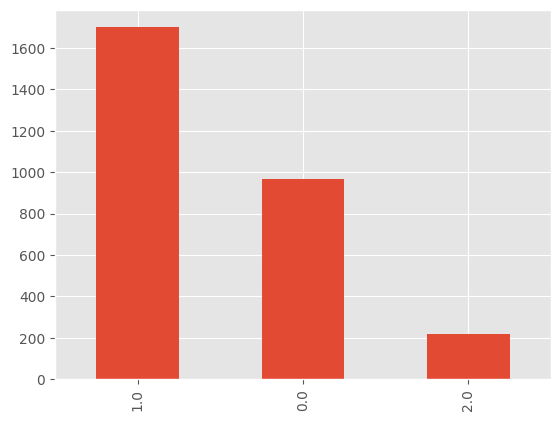

In [174]:
data['class'].value_counts().plot(kind='bar')

Exploring null values

In [175]:
data.isnull().sum()

ra             0
dec            0
u              0
g              0
r              0
i              0
z              0
mjd            0
petroRad_u     0
petroRad_g     0
petroRad_i     0
petroRad_r     0
petroRad_z     0
petroFlux_u    0
petroFlux_g    0
petroFlux_i    0
petroFlux_r    0
petroFlux_z    0
petroR50_u     0
petroR50_g     0
petroR50_i     0
petroR50_r     0
petroR50_z     0
psfMag_u       0
psfMag_r       0
psfMag_g       0
psfMag_i       0
psfMag_z       1
expAB_u        1
expAB_g        1
expAB_r        1
expAB_i        1
expAB_z        1
redshift       1
class          1
dtype: int64

Duplicates

In [176]:
data.duplicated().sum()

0

<Axes: >

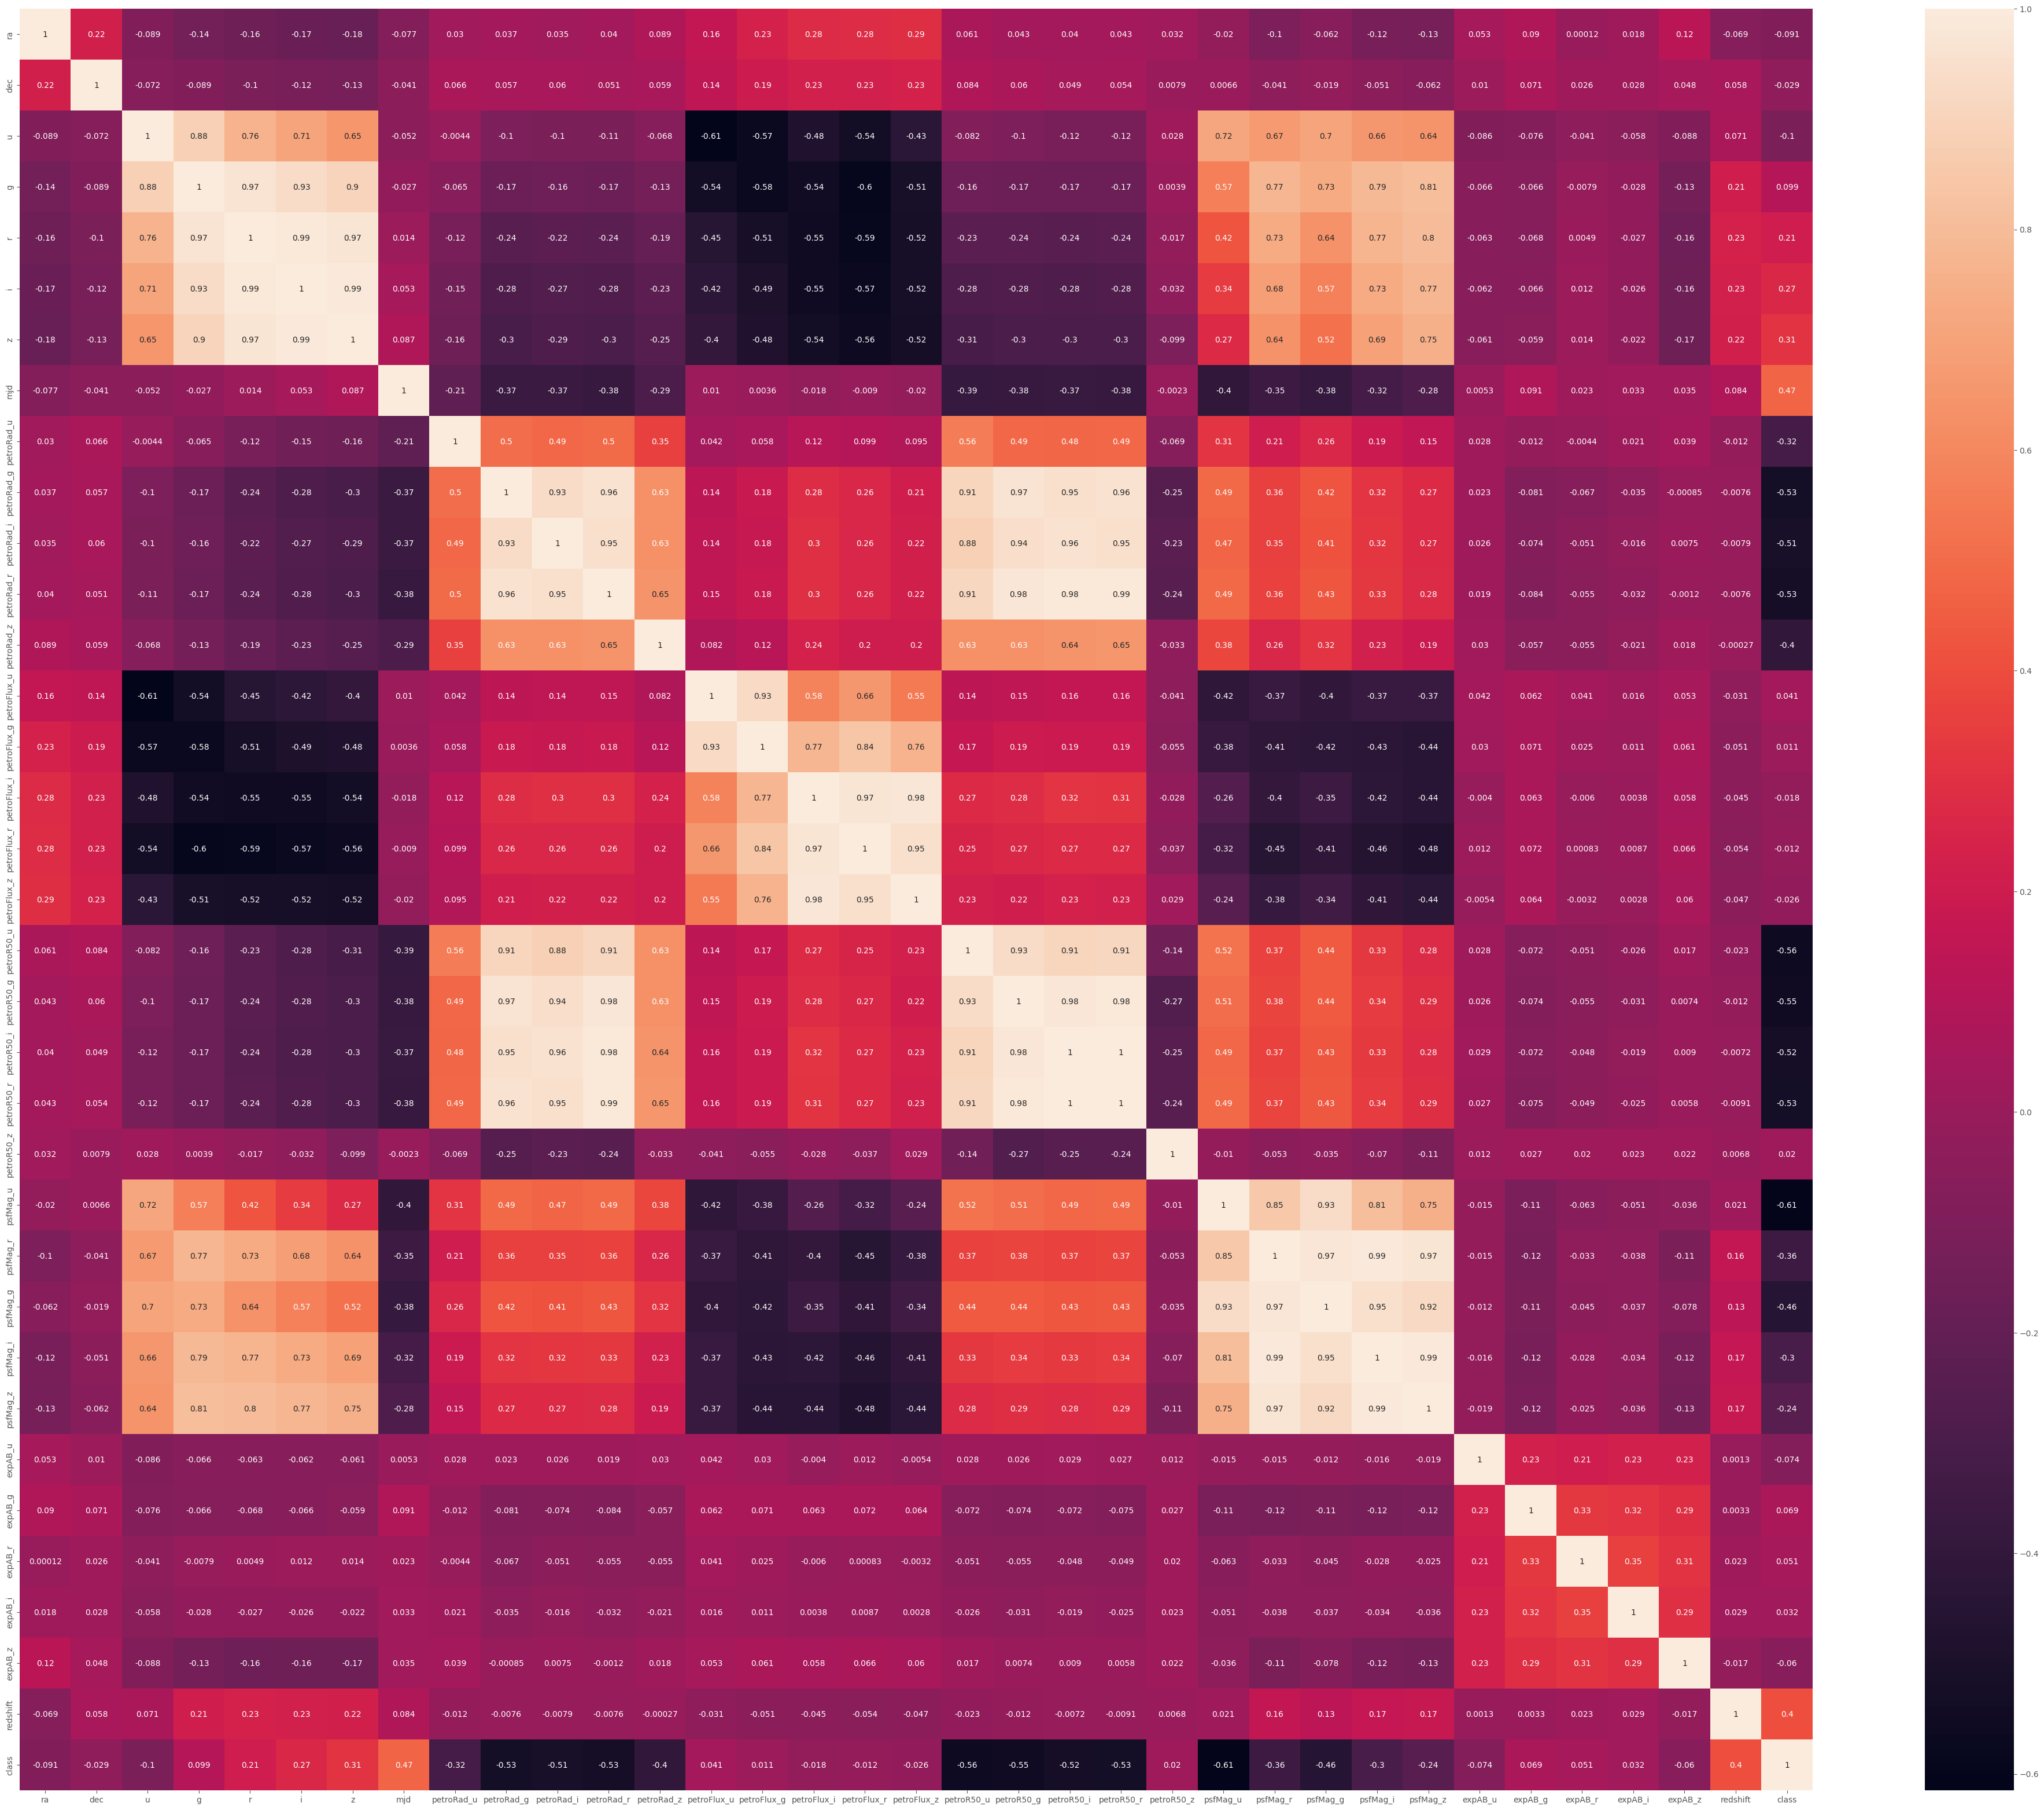

In [177]:
plt.figure(figsize=(50,40))
sns.heatmap(data.corr(),fmt='.2g',annot=True)

In [178]:
data = data.fillna(0)

### Data Cleaning
The data was very clean, all we did is remove a few columns that provide technical information on the device capturing the data.

The only column we had to modify so far is the `class` column which was a string, we mapped the class to numerical values
- 0: `GALAXY`
- 1: `STAR`
- 2: `QSO`

The following features were removed:
- `objid`
- `specobjid`
- `rerun`
- `plate`
- `fiberid`
- `run`
- `camcol`
- `field`



## Summary (EDA, Cleaning)
Our data is clean overall and the only thing we might want to do is use a scalar to bring values from different columns closer together

## Modeling
We'll be building 3 different models:
1. Random Forest
2. SVM
3. Decision Tree

We'll start by splitting the data

In [179]:
y = data['class']
X = data.drop(['class'], axis = 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

In [180]:
print(f"Shape of X_train: {X_train.shape}\nShape of y_train: {y_train.shape}\nShape of X_val: {X_val.shape}\nShape of y_val: {y_val.shape}")

Shape of X_train: (2455, 34)
Shape of y_train: (2455,)
Shape of X_val: (434, 34)
Shape of y_val: (434,)


### Random Forests
Random forests are quite easy to understand and simple to implement;

Our trees will start with a root feature, then branch out into decision nnodes or leaf nodes

> Note: The hyperparameters were chosen after testing, hyperparameter tuning can be done using `GridSearchCV`

In [181]:
rfc = RandomForestClassifier(n_estimators = 300, random_state = 42, max_depth = 25)

In [182]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=42)

In [183]:
y_pred = rfc.predict(X_val)

In [184]:
rfc_acc_score = accuracy_score(y_val, y_pred)

In [185]:
print(f"Accuracy Score for RandomForestClassifier: {100*rfc_acc_score:.2f}%")

Accuracy Score for RandomForestClassifier: 99.08%


In [186]:
target_names = ['GALAXY', 'STAR', 'QSO']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99       141
        STAR       1.00      1.00      1.00       258
         QSO       1.00      0.91      0.96        35

    accuracy                           0.99       434
   macro avg       0.99      0.97      0.98       434
weighted avg       0.99      0.99      0.99       434



### SVM
SVM creates decision boundaries in order to classify objects.

To use SVM we'll need to apply a scalarto make sure our objects' values don't range wildly

In [187]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [188]:
# Create our SVM classifier
svm_classifier = SVC(kernel='linear', random_state = 42, C = 1.0)

In [189]:
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [190]:
y_pred = svm_classifier.predict(X_val_scaled)

In [191]:
svm_acc_score = accuracy_score(y_val, y_pred)
print(f"SVM Classifier Accuracy: {100*svm_acc_score:.2f}%")

SVM Classifier Accuracy: 98.85%


In [192]:
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98       141
        STAR       1.00      1.00      1.00       258
         QSO       0.97      0.94      0.96        35

    accuracy                           0.99       434
   macro avg       0.98      0.97      0.98       434
weighted avg       0.99      0.99      0.99       434



### KNN
KNN will try to identify similar data points and cluster them into classes

We need to use the same scaled features we used for our SVM model

In [193]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [194]:
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(weights='distance')

In [195]:
y_pred = knn_classifier.predict(X_val_scaled)

In [196]:
knn_acc_score = accuracy_score(y_val, y_pred)

In [197]:
print(f"KNN Classifier Accuracy: {100*knn_acc_score:.2f}%")

KNN Classifier Accuracy: 97.24%


In [198]:
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      GALAXY       0.95      0.99      0.97       141
        STAR       0.98      0.99      0.99       258
         QSO       1.00      0.74      0.85        35

    accuracy                           0.97       434
   macro avg       0.98      0.91      0.94       434
weighted avg       0.97      0.97      0.97       434



### Importance
Using the following feature importance chart we can decide whether to remove some of the features that contribute little to none for our task

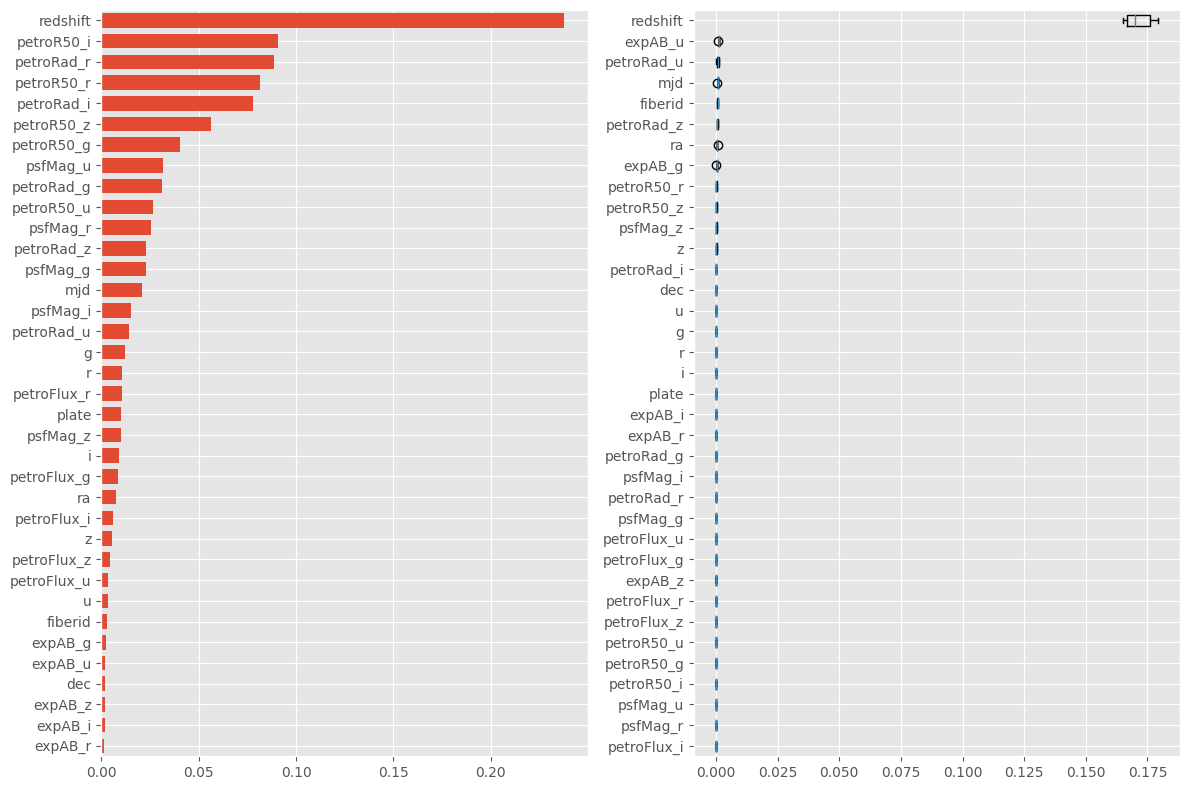

In [163]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rfc, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rfc.feature_importances_)
tree_indices = np.arange(0, len(rfc.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, rfc.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(data.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(rfc.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=data.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

The following features could be removed with minimal impact and/or possibly even improving accuracy slightly or training time:
- `expAB_u`
- `expAB_z`
- `fiberid`
- `expAB_i`
- `dec`
- `ra`
- `expAB_g`
- `expAB_r`

## Models Summary
All our models used the same train-test split, the only difference that separates our Random Forest model from KNN / SVM is that we need to scale our features using a StandardScaler.

With some minor hyperparameter tuning on the `Random Forest model` we were able to achieve `99.08%` accuracy, it's likely that we can achieve a higher accuracy score by using `GridSearchCV` to explore better hyperparameters for our model.

## Model Recommendation
As our accuracy scores show and from the explainability perspective, the `Random Forest` is likely the best model as it is simple, highly interpretable, quite fast and easy to understand as classifying celestial objects with the given parameters can be done with a decision based model, similar to the human process.

# Summary and next steps
We were able to classify celestial objects (Galaxies, Stars, Quasars) at +99% accuracy, making classification work much simpler and faster with minor errors.

Using these models we can automate the classification process of celestial objects, thus saving time, money and improving accuracy by avoiding human errors.

For the next steps we could:
- Train a model on a larger dataset
- Remove low importance features
- Add additional classes
- Build an API to serve the model via a user friendly UI